# Preprocessing the raw BBC Text Document Data

In [1]:
import os

bbc_dir='D:\\TensorFlow Programs\\Text Classification Programs and Datasets\\bbc'

labels = []
texts = []

for label_type in ['business','entertainment','politics','sport','tech']:
    dir_name=os.path.join(bbc_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type=='business':
                labels.append(0)
            elif label_type=='entertainment':
                labels.append(1)
            elif label_type=='politics':
                labels.append(2)
            elif label_type=='sport':
                labels.append(3)
            elif label_type=='tech':
                labels.append(4)

# Tokenizing the data

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

maxlen=400
training_samples=1900
validation_samples=len(texts)-training_samples
max_words=30000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
print('Found %s unique tokens'%len(word_index))

data=pad_sequences(sequences, maxlen=maxlen)

labels=np.asarray(labels)
labels=to_categorical(labels,num_classes=5)
print(labels.shape)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
      
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

Using TensorFlow backend.


Found 32360 unique tokens
(2225, 5)
Shape of data tensor: (2225, 400)
Shape of label tensor: (2225, 5)


# Defining a model

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras import optimizers

embedding_dim=100
model=Sequential()
model.add(Embedding(max_words,embedding_dim))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 3,004,421
Trainable params: 3,004,421
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [5]:
history=model.fit(x_train,y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1900 samples, validate on 325 samples
Epoch 1/10
1900/1900 [==============================] - 16s 8ms/step - loss: 1.6107 - categorical_accuracy: 0.2226 - val_loss: 1.5886 - val_categorical_accuracy: 0.2523
Epoch 2/10
1900/1900 [==============================] - 9s 5ms/step - loss: 1.4862 - categorical_accuracy: 0.3937 - val_loss: 1.5614 - val_categorical_accuracy: 0.3169
Epoch 3/10
1900/1900 [==============================] - 9s 5ms/step - loss: 1.3406 - categorical_accuracy: 0.6126 - val_loss: 1.4050 - val_categorical_accuracy: 0.4338
Epoch 4/10
1900/1900 [==============================] - 9s 5ms/step - loss: 1.2263 - categorical_accuracy: 0.7242 - val_loss: 1.3931 - val_categorical_accuracy: 0.4369
Epoch 5/10
1900/1900 [==============================] - 9s 5ms/step - loss: 1.1073 - categorical_accuracy: 0.8189 - val_loss: 1.3385 - val_categorical_accuracy: 0.4615
Epoch 6/10
1900/1900 [==============================] - 9s 5ms/s

# Plotting the results

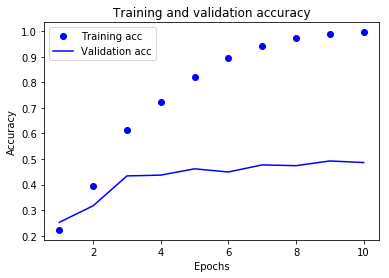

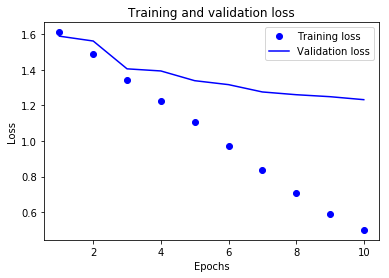

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()